In [1]:
# import the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Using pandas to look at the data
data = pd.read_csv('data/Crime_Data_2019.csv')

data.head(5)

/Users/chriskehl/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-19-011839,2/16/19 7:44,2/16/19 3:52,"TBUT OR DISP SHOPLIFTING $500 OR > BUT < $10,000",THEFT/LARCENY,23C,PART I,COMPLETED,3RD DIVISION,315,DRUG STORE/DR`S OFFICE/HOSPITAL,7500 BLOCK TERRY RD ...,LOUISVILLE,40258,1224259
1,80-19-011841,2/16/19 8:00,2/16/19 4:00,PROPERTY LOST OR ABANDONED NON CRIMINAL,OTHER,90Z,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,3000 BLOCK SPRINGFIELD DR ...,LOUISVILLE,40214,1224260
2,80-19-011851,2/15/19 16:21,2/13/19 16:15,BURGLARY - 3RD DEGREE,BURGLARY,220,PART I,COMPLETED,3RD DIVISION,331,RENTAL / STORAGE FACILITY,5500 BLOCK GREENBELT HWY ...,LOUISVILLE,40216,1224261
3,80-19-011881,2/16/19 12:38,2/10/19 11:30,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",THEFT/LARCENY,23H,PART I,COMPLETED,2ND DIVISION,236,RESIDENCE / HOME,4000 BLOCK WILMOTH AVE ...,LOUISVILLE,40216,1224262
4,80-19-011884,2/16/19 13:00,2/10/19 0:00,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",THEFT/LARCENY,23H,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,3900 BLOCK S 2ND ST ...,LOUISVILLE,40214,1224263


In [3]:
# look at the data type and summary of statistics
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146253 entries, 0 to 146252
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   INCIDENT_NUMBER  146253 non-null  object
 1   DATE_REPORTED    146253 non-null  object
 2   DATE_OCCURED     146252 non-null  object
 3   UOR_DESC         146253 non-null  object
 4   CRIME_TYPE       146253 non-null  object
 5   NIBRS_CODE       146253 non-null  object
 6   UCR_HIERARCHY    143159 non-null  object
 7   ATT_COMP         146110 non-null  object
 8   LMPD_DIVISION    146253 non-null  object
 9   LMPD_BEAT        146195 non-null  object
 10  PREMISE_TYPE     146223 non-null  object
 11  BLOCK_ADDRESS    146253 non-null  object
 12  CITY             146230 non-null  object
 13  ZIP_CODE         145800 non-null  object
 14  ID               146253 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 16.7+ MB


In [4]:
# find out if there are any null values
data.isnull().values.any()

True

In [5]:

# check and see where the null values are at
null_counts = data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

UCR_HIERARCHY    3094
ZIP_CODE          453
ATT_COMP          143
LMPD_BEAT          58
PREMISE_TYPE       30
CITY               23
DATE_OCCURED        1
dtype: int64

In [6]:
data = data.dropna(axis=0)

In [7]:
# find out if there are any null values
data.isnull().values.any()

False

In [8]:
# Look up crime where PREMISE_TYPE = SERVICE / GAS STATION and ZIP Code is 40272

# look at the premise type and crime type
by_Premise = pd.crosstab(data['CRIME_TYPE'], data['PREMISE_TYPE'])
by_Premise


PREMISE_TYPE,ABANDONED/CONDEMNED STRUCTURE,AIR / BUS / TRAIN TERMINAL,AMUSEMENT PARK,ATM SEPARATE FROM BANK,ATTACHED RESIDENTIAL GARAGE,AUTO DEALERSHIP (NEW OR USED),BANK / SAVINGS & LOAN,BAR / NIGHT CLUB,CAMP / CAMPGROUND,CEMETERY / GRAVEYARD,...,PARK / PLAYGROUND,PARKING LOT / GARAGE,RACE TRACK/GAMBLING FACILITY,RENTAL / STORAGE FACILITY,RESIDENCE / HOME,RESTAURANT,SCHOOL - COLLEGE / UNIVERSITY,SCHOOL - ELEMENTARY / SECONDARY,SERVICE / GAS STATION,"SPECIALTY STORE (TV, FUR, ETC)"
CRIME_TYPE,,,,,,,,,,,,,,,,,,,,,
ARSON,1,0,0,0,1,1,0,1,0,0,...,1,4,1,2,81,0,1,2,3,0
ASSAULT,6,27,13,5,1,16,22,234,3,2,...,153,848,11,19,18005,400,18,188,303,107
BURGLARY,18,1,1,0,115,64,3,25,1,3,...,10,76,1,695,4769,167,4,18,78,276
DISTURBING THE PEACE,2,0,1,0,1,2,1,6,0,0,...,4,31,0,10,439,10,1,4,17,7
DRUGS/ALCOHOL VIOLATIONS,24,8,2,0,0,10,5,39,0,11,...,131,750,7,19,2565,64,3,37,188,13
DUI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
FRAUD,1,5,2,69,0,96,380,21,0,0,...,7,143,4,92,1443,279,1,6,437,243
HOMICIDE,0,0,0,0,0,0,0,3,0,0,...,7,28,0,0,96,2,0,0,3,0
MOTOR VEHICLE THEFT,0,6,1,0,3,163,4,34,1,1,...,17,2145,1,41,3886,49,3,5,240,37


In [9]:
d = data.groupby(['PREMISE_TYPE']).size().sort_values(ascending=False)
top10_premiseType=d.head(10)
top10_premiseType

PREMISE_TYPE
RESIDENCE / HOME                     60349
HIGHWAY / ROAD / ALLEY               23066
PARKING LOT / GARAGE                 13051
OTHER RESIDENCE (APARTMENT/CONDO)     8198
OTHER / UNKNOWN                       5347
DEPARTMENT / DISCOUNT STORE           5311
SERVICE / GAS STATION                 2650
CONVENIENCE STORE                     2238
SPECIALTY STORE (TV, FUR, ETC)        2126
RESTAURANT                            2077
dtype: int64

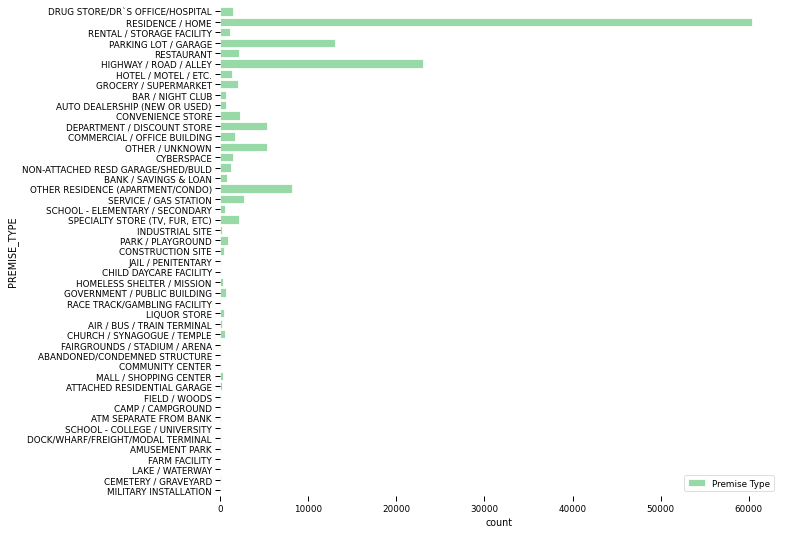

In [10]:

sns.set_context('paper')

f, ax = plt.subplots(figsize = (10,9))
sns.set_color_codes('pastel')
sns.countplot(y = 'PREMISE_TYPE', data = data,
            label = 'Premise Type', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

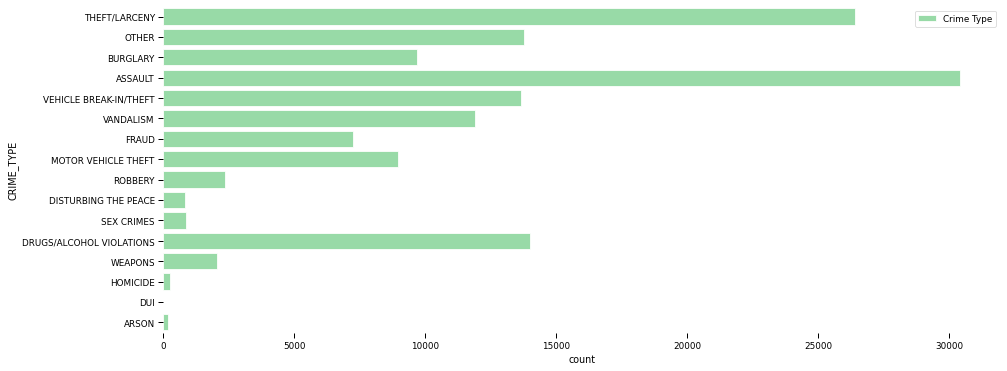

In [11]:
#sns.countplot(y='CRIME_TYPE', data=data);
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.countplot(y = 'CRIME_TYPE', data = data,
            label = 'Crime Type', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

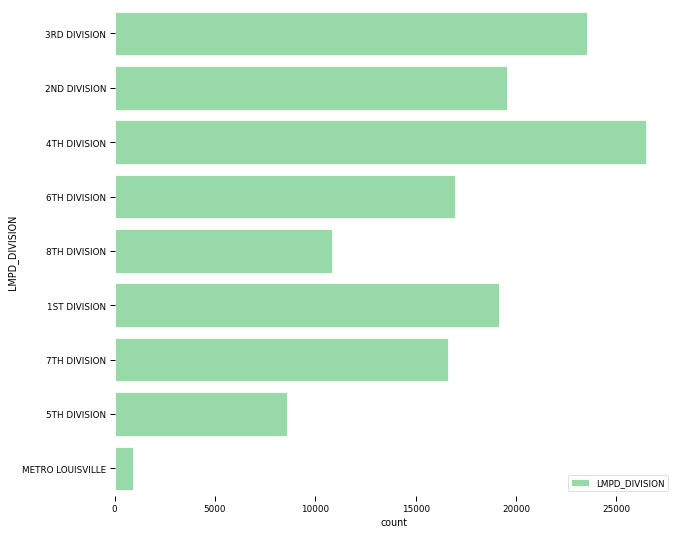

In [12]:
#sns.countplot(y='CRIME_TYPE', data=data);
sns.set_context('paper')

f, ax = plt.subplots(figsize = (10,9))
sns.set_color_codes('pastel')
sns.countplot(y = 'LMPD_DIVISION', data = data,
            label = 'LMPD_DIVISION', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

In [13]:
# Top zip codes where the crime is occurring
data = data.groupby(['ZIP_CODE']).size().sort_values(ascending=False)
data

ZIP_CODE
40214.0     5842
40211.0     5290
40203.0     4910
40219.0     4836
40215.0     4632
            ... 
40025.0        2
DRIVEWAY       1
40043          1
402545         1
4291.0         1
Length: 78, dtype: int64